In [1]:
!pip install torchdata
!pip install -U torchtext==0.13.0
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.12.1-cp37-cp37m-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.0+cu113 requires torch==1.12.0, but you have torch 1.12.1 which is incompatible.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.12.1 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.12.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.12.0-cp37-cp37m-manylinux1_x86_64.whl (776.3 MB)
  Attempting uninstall: torch
    Found existin

In [2]:
import torch
import torchtext
import datasets

In [3]:
from torchtext.vocab import GloVe

glove = GloVe(name='6B')
glove50 = GloVe(name='6B', dim=50)

.vector_cache/glove.6B.zip: 862MB [02:39, 5.39MB/s]                           
100%|█████████▉| 399999/400000 [00:13<00:00, 28920.06it/s]


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
# get dataset from hugging face library
train_data, test_data = datasets.load_dataset('imdb', split = ['train', 'test'])

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
from torchtext.data.utils import get_tokenizer

# use a standard english tokenizer
tokenizer = get_tokenizer('basic_english')

In [7]:
# function that tokenizes the data
def tokenize_data(ex):
  tokens = {'tokens': tokenizer(ex['text'])}
  return tokens

In [8]:
# add a tokens column with the tokens for each text review
# Documentation: https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.map
train_data = train_data.map(tokenize_data)
test_data = test_data.map(tokenize_data)

  0%|          | 0/25000 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [9]:
train_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [10]:
#Documentation: https://huggingface.co/docs/datasets/v2.4.0/en/package_reference/main_classes#datasets.Dataset.train_test_split
# split the training data into training and validation data
train_valid_data = train_data.train_test_split() # default test_size is 0.25
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [11]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens'],
     num_rows: 25000
 }))

In [13]:
from torchtext.vocab import Vocab, build_vocab_from_iterator

UNK_IDX, PAD_IDX = 0, 1
special_symbols = ['<unk>', '<pad>']

# build vocab from the text tokens from training data
vocab = build_vocab_from_iterator(train_data['tokens'], min_freq = 50, specials = special_symbols)

# set unknown index as the default
vocab.set_default_index(UNK_IDX)

In [14]:
def transform_tokens_bow(ex):
  bow = torch.zeros(len(vocab))
  c = 0 
  for token in ex['tokens']:
    bow[vocab[token]] += 1
    c += 1
  bow = {'bow': bow/c}
  return bow

In [15]:
train_data = train_data.map(transform_tokens_bow)
valid_data = valid_data.map(transform_tokens_bow)
test_data = test_data.map(transform_tokens_bow)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [16]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens', 'bow'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens', 'bow'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens', 'bow'],
     num_rows: 25000
 }))

In [17]:
train_data[0]

{'bow': [0.0,
  0.0,
  0.054054055362939835,
  0.027027027681469917,
  0.0,
  0.027027027681469917,
  0.0,
  0.027027027681469917,
  0.054054055362939835,
  0.0810810774564743,
  0.0,
  0.0,
  0.0,
  0.054054055362939835,
  0.027027027681469917,
  0.054054055362939835,
  0.027027027681469917,
  0.0,
  0.0,
  0.0,
  0.027027027681469917,
  0.054054055362939835,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.027027027681469917,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.054054055362939835,
  0.027027027681469917,
  0.0,
  0.027027027681469917,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.027027027681469917,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.027027027681469917,
  0.0,
  0.0,
  0.0,
  0.0,
  0.027027027681469917,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [18]:
# SIMPLE BOW CLASSIFIER

from torch import nn
import torch.nn.functional as F

class BoWClassifier(nn.Module):
# I referred to this tutorial for help: https://pytorch.org/tutorials/beginner/nlp/deep_learning_tutorial.html#sphx-glr-beginner-nlp-deep-learning-tutorial-py
    def __init__(self, num_labels, vocab_size):
        super(BoWClassifier, self).__init__()
        self.linear = nn.Linear(vocab_size, num_labels)
    def forward(self, bow_vec):
        #print('bow vector')
        #print(bow_vec)
        #print('bow shape')
        #print(bow_vec.shape)
        # pass through linear layer and then softmax
        return F.log_softmax(self.linear(bow_vec), dim=1)

In [178]:
# collate function to put examples in batches 
def collate_batch(batch):
  batch_bows, batch_labels = [], []

  for b in batch: 
    #print(b)
    batch_bows.append(torch.tensor(b['bow'])) # all bow vectors should be the same length (len of vocab)
    batch_labels.append(torch.tensor(b['label']))

  batch_bows = torch.stack(batch_bows)
  batch_labels = torch.stack(batch_labels)

  batch = {'bows': batch_bows,
           'labels': batch_labels}
  
  return batch

In [180]:
INPUT_DIM = len(vocab)
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = BoWClassifier(OUTPUT_DIM, INPUT_DIM)
model = model.to(device)

criterion = nn.NLLLoss() #nn.CrossEntropyLoss()
criterion = criterion.to(device)

In [181]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

BoWClassifier(
  (linear): Linear(in_features=474, out_features=2, bias=True)
)

In [182]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

In [183]:
for i, b in enumerate(train_dataloader):
  print('b')
  print(b['bows'].shape)
  print(b)

  if i > -1:
    break

b
torch.Size([1000, 474])
{'bows': tensor([[0.2689, 0.0000, 0.0562,  ..., 0.0000, 0.0014, 0.0000],
        [0.3233, 0.0000, 0.0977,  ..., 0.0000, 0.0000, 0.0000],
        [0.3548, 0.0000, 0.0622,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2420, 0.0000, 0.0510,  ..., 0.0000, 0.0000, 0.0000],
        [0.1745, 0.0000, 0.0336,  ..., 0.0000, 0.0000, 0.0000],
        [0.2379, 0.0000, 0.0146,  ..., 0.0000, 0.0000, 0.0000]]), 'labels': tensor([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [221]:
import torch.optim as optim

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [222]:
def get_accuracy(predictions, actual_labels):
  batch_size = predictions.shape[0]
  #print('predictions')
  #print(predictions)
  predicted_labels = predictions.argmax(1)
  #print('predicted labels')
  #print(predicted_labels)
  #print('actual labels')
  #print(actual_labels)
  num_correct = (predicted_labels == actual_labels).sum()
  accuracy = num_correct / batch_size
  #print('num correct')
  #print(num_correct)
  #print('accuracy')
  #print(accuracy)
  return accuracy

In [223]:
def train(dataloader):
  model.train()

  epoch_loss, epoch_accuracy = 0, 0
  #log_interval = 500

  for idx, batch in enumerate(dataloader):
    token_bows = batch['bows'].to(device)
    labels = batch['labels'].to(device)
    optimizer.zero_grad()
    predictions = model(token_bows)
    loss = criterion(predictions, labels)
    accuracy = get_accuracy(predictions, labels)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy.item()

    #if idx % log_interval == 0 and idx > 0:
    #  print(f'At iteration {idx} the loss is {loss:.3f}.')
    #  print(f'At iteration {idx} the accuracy is {accuracy:.3f}.')

  return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [224]:
def evaluate(dataloader):
  model.eval()

  epoch_loss, epoch_accuracy = 0, 0

  with torch.no_grad():
    for idx, batch in enumerate(dataloader):
      token_bows = batch['bows'].to(device)
      labels = batch['labels'].to(device)
      predictions = model(token_bows)
      loss = criterion(predictions, labels)
      accuracy = get_accuracy(predictions, labels)
      epoch_loss += loss.item()
      epoch_accuracy += accuracy.item()
  
  return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [225]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [226]:
len(vocab)

474

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# TESTING - just to double check accuracy numbers

N_EPOCHS = 1
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
  start_time = time.time()

  train_loss, train_acc = train(train_dataloader)
  valid_loss, valid_acc = evaluate(valid_dataloader)
  test_loss, test_acc = evaluate(test_dataloader)

  end_time = time.time()

  valid_accuracies.append(valid_acc)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
    
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  # save the best model
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'tut2-model.pt')

  print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
  print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
  print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
  print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Streaming output truncated to the last 5000 lines.
predictions
tensor([[-0.0600, -2.8431],
        [-3.8231, -0.0221],
        [-1.7350, -0.1941]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)
predicted labels
tensor([0, 1, 1], device='cuda:0')
actual labels
tensor([0, 1, 1], device='cuda:0')
num correct
tensor(3, device='cuda:0')
accuracy
tensor(1., device='cuda:0')
predictions
tensor([[-4.7007e+00, -9.1300e-03],
        [-3.1555e+00, -4.3554e-02],
        [-8.0324e+00, -3.2479e-04]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)
predicted labels
tensor([1, 1, 1], device='cuda:0')
actual labels
tensor([1, 0, 1], device='cuda:0')
num correct
tensor(2, device='cuda:0')
accuracy
tensor(0.6667, device='cuda:0')
predictions
tensor([[-4.9381e-01, -9.4238e-01],
        [-1.4243e+01, -5.9605e-07],
        [-8.1210e+00, -2.9726e-04]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)
predicted labels
tensor([0, 1, 1], device='cuda:0')
actual labels
tensor([0, 1, 0], device='cu

KeyboardInterrupt: ignored

Epoch: 01 | Time: 2m 38s
train_loss: 0.644, train_acc: 0.671
valid_loss: 0.592, valid_acc: 0.791
test loss: 0.596, test_acc: 0.784
Epoch: 02 | Time: 2m 39s
train_loss: 0.552, train_acc: 0.811
valid_loss: 0.525, valid_acc: 0.818
test loss: 0.532, test_acc: 0.812
Epoch: 03 | Time: 2m 38s
train_loss: 0.492, train_acc: 0.843
valid_loss: 0.478, valid_acc: 0.840
test loss: 0.487, test_acc: 0.832
Epoch: 04 | Time: 2m 39s
train_loss: 0.449, train_acc: 0.859
valid_loss: 0.445, valid_acc: 0.850
test loss: 0.455, test_acc: 0.840
Epoch: 05 | Time: 2m 38s
train_loss: 0.417, train_acc: 0.869
valid_loss: 0.421, valid_acc: 0.857
test loss: 0.431, test_acc: 0.847
Epoch: 06 | Time: 2m 38s
train_loss: 0.392, train_acc: 0.876
valid_loss: 0.402, valid_acc: 0.863
test loss: 0.413, test_acc: 0.850
Epoch: 07 | Time: 2m 38s
train_loss: 0.372, train_acc: 0.880
valid_loss: 0.386, valid_acc: 0.865
test loss: 0.398, test_acc: 0.853
Epoch: 08 | Time: 2m 39s
train_loss: 0.356, train_acc: 0.885
valid_loss: 0.374, val

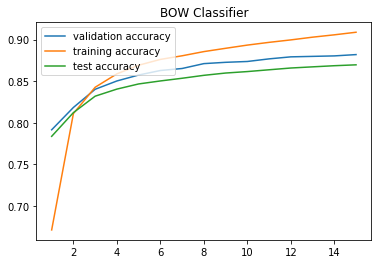

In [ ]:
# BOW

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
  start_time = time.time()

  train_loss, train_acc = train(train_dataloader)
  valid_loss, valid_acc = evaluate(valid_dataloader)
  test_loss, test_acc = evaluate(test_dataloader)

  end_time = time.time()

  valid_accuracies.append(valid_acc)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
    
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  # save the best model
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'tut2-model.pt')

  print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
  print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
  print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
  print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW Classifier')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [17]:
# CBOW

In [228]:
# CBOW

# using GloVe pretrained vectors
def transform_tokens_cbow(ex):
  words = ex['tokens']
  cbow = glove.get_vecs_by_tokens(words).sum(axis=0)
  bow = {'cbow': cbow}
  return bow

In [229]:
train_data = train_data.map(transform_tokens_cbow)
valid_data = valid_data.map(transform_tokens_cbow)
test_data = test_data.map(transform_tokens_cbow)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [230]:
train_data, valid_data, test_data

(Dataset({
     features: ['text', 'label', 'tokens', 'cbow'],
     num_rows: 18750
 }), Dataset({
     features: ['text', 'label', 'tokens', 'cbow'],
     num_rows: 6250
 }), Dataset({
     features: ['text', 'label', 'tokens', 'cbow'],
     num_rows: 25000
 }))

In [21]:
train_data[0]

{'bow': [0.032258063554763794,
  0.0,
  0.06451612710952759,
  0.05161290243268013,
  0.016129031777381897,
  0.032258063554763794,
  0.032258063554763794,
  0.019354838877916336,
  0.012903225608170033,
  0.009677419438958168,
  0.025806451216340065,
  0.03548387065529823,
  0.009677419438958168,
  0.029032258316874504,
  0.012903225608170033,
  0.009677419438958168,
  0.003225806402042508,
  0.009677419438958168,
  0.003225806402042508,
  0.006451612804085016,
  0.003225806402042508,
  0.016129031777381897,
  0.0,
  0.0,
  0.006451612804085016,
  0.006451612804085016,
  0.009677419438958168,
  0.003225806402042508,
  0.003225806402042508,
  0.0,
  0.0,
  0.0,
  0.006451612804085016,
  0.003225806402042508,
  0.003225806402042508,
  0.0,
  0.0,
  0.003225806402042508,
  0.003225806402042508,
  0.003225806402042508,
  0.0,
  0.0,
  0.003225806402042508,
  0.0,
  0.006451612804085016,
  0.006451612804085016,
  0.0,
  0.0,
  0.006451612804085016,
  0.009677419438958168,
  0.0032258064020

In [22]:
# CBOW Collate Function

# collate function to put examples in batches 
def collate_batch(batch):
  batch_bows, batch_labels = [], []

  for b in batch: 
    #print(b)
    batch_bows.append(torch.tensor(b['cbow'])) # all bow vectors should be the same length (len of vocab)
    batch_labels.append(torch.tensor(b['label']))

  batch_bows = torch.stack(batch_bows)
  batch_labels = torch.stack(batch_labels)

  batch = {'cbows': batch_bows,
           'labels': batch_labels}
  
  return batch

In [23]:
# Re-initialize model for CBOW

INPUT_DIM = 300 # size of the pre-trained vectors
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = BoWClassifier(OUTPUT_DIM, INPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

In [24]:
# Re-initialize dataloader

from torch.utils.data import DataLoader

BATCH_SIZE = 1000

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

In [ ]:
def get_accuracy(predictions, actual_labels):
  batch_size = predictions.shape[0]
  #print('predictions')
  #print(predictions)
  predicted_labels = predictions.argmax(1)
  #print('predicted labels')
  #print(predicted_labels)
  #print('actual labels')
  #print(actual_labels)
  num_correct = (predicted_labels == actual_labels).sum()
  accuracy = num_correct / batch_size
  #print('num correct')
  #print(num_correct)
  #print('accuracy')
  #print(accuracy)
  return accuracy

In [250]:
# CBOW Train Function

def train(dataloader):
  model.train()

  epoch_loss, epoch_accuracy = 0, 0
  #log_interval = 500

  for idx, batch in enumerate(dataloader):
    token_bows = batch['cbows'].to(device)
    labels = batch['labels'].to(device)
    optimizer.zero_grad()
    predictions = model(token_bows)
    loss = criterion(predictions, labels)
    accuracy = get_accuracy(predictions, labels)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy.item()

    #if idx % log_interval == 0 and idx > 0:
    #  print(f'At iteration {idx} the loss is {loss:.3f}.')
    #  print(f'At iteration {idx} the accuracy is {accuracy:.3f}.')

  return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [251]:
# CBOW Evaluate Function

def evaluate(dataloader):
  model.eval()

  epoch_loss, epoch_accuracy = 0, 0

  with torch.no_grad():
    for idx, batch in enumerate(dataloader):
      token_bows = batch['cbows'].to(device)
      labels = batch['labels'].to(device)
      predictions = model(token_bows)
      loss = criterion(predictions, labels)
      accuracy = get_accuracy(predictions, labels)
      epoch_loss += loss.item()
      epoch_accuracy += accuracy.item()
  
  return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

Epoch: 01 | Time: 3m 57s
train_loss: 310.323, train_acc: 0.525
valid_loss: 97.008, valid_acc: 0.588
test loss: 99.491, test_acc: 0.578
Epoch: 02 | Time: 3m 56s
train_loss: 80.983, train_acc: 0.633
valid_loss: 38.482, valid_acc: 0.717
test loss: 38.647, test_acc: 0.709
Epoch: 03 | Time: 3m 53s
train_loss: 31.653, train_acc: 0.716
valid_loss: 18.933, valid_acc: 0.744
test loss: 19.297, test_acc: 0.743
Epoch: 04 | Time: 3m 53s
train_loss: 12.649, train_acc: 0.788
valid_loss: 9.041, valid_acc: 0.796
test loss: 9.272, test_acc: 0.794
Epoch: 05 | Time: 3m 54s
train_loss: 7.389, train_acc: 0.807
valid_loss: 6.603, valid_acc: 0.808
test loss: 6.430, test_acc: 0.806
Epoch: 06 | Time: 3m 54s
train_loss: 5.961, train_acc: 0.803
valid_loss: 9.070, valid_acc: 0.752
test loss: 8.962, test_acc: 0.750
Epoch: 07 | Time: 3m 55s
train_loss: 8.415, train_acc: 0.764
valid_loss: 6.385, valid_acc: 0.786
test loss: 6.455, test_acc: 0.785
Epoch: 08 | Time: 3m 58s
train_loss: 8.487, train_acc: 0.766
valid_loss:

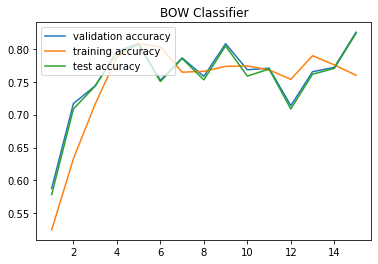

In [33]:
# CBOW 

N_EPOCHS = 15
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
  start_time = time.time()

  train_loss, train_acc = train(train_dataloader)
  valid_loss, valid_acc = evaluate(valid_dataloader)
  test_loss, test_acc = evaluate(test_dataloader)

  end_time = time.time()

  valid_accuracies.append(valid_acc)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
    
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  # save the best model
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'tut2-model.pt')

  print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
  print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
  print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
  print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('CBOW Classifier')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

In [1]:
#RNN

In [19]:
# using GloVe pretrained vectors
def transform_tokens_emb(ex):
  words = ex['tokens']
  emb = glove50.get_vecs_by_tokens(words).sum(axis=0)
  bow = {'emb': emb}
  return bow

In [20]:
train_data = train_data.map(transform_tokens_emb)
valid_data = valid_data.map(transform_tokens_emb)
test_data = test_data.map(transform_tokens_emb)

  0%|          | 0/18750 [00:00<?, ?ex/s]

  0%|          | 0/6250 [00:00<?, ?ex/s]

  0%|          | 0/25000 [00:00<?, ?ex/s]

In [45]:
# SIMPLE RNN MODEL
from torch import nn

class RNN(nn.Module):
# I referred to this tutorial for help: https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/1%20-%20Simple%20Sentiment%20Analysis.ipynb
    def __init__(self, emb_dim, hid_dim, output_dim):
        super().__init__()
        # embedding layer
        #self.embedding = nn.Embedding(vocab_size, emb_dim)
        # RNN layer
        self.rnn = nn.RNN(emb_dim, hid_dim) # default batch_first is False
        # linear layer
        self.linear = nn.Linear(hid_dim, output_dim)
    def forward(self, text):
        # input text is dimension [seq_len, batch_size]
        # apply embeddings to the words
        #print(text.shape)
        embedded = text # [1, batch_size, emb_dim] pre-trained embeddings are the text input provided
        #embedded = self.embedding(text)
        #print(embedded.shape)
        # embedded is dimension [seq_len, batch_size, emb_dim] because batch_first = False
        # run through RNN
        output, hidden = self.rnn(embedded)
        # hidden is dimension [1, batch_size, hid_dim]
        # get the predictions
        scores = self.linear(hidden.squeeze(0))
        # scores should have the dimension [batch_size, output_dim]
        return scores

In [46]:
# collate function to put examples in batches 
def collate_batch(batch):
  batch_embs, batch_labels = [], []

  for b in batch: 
    #print(b)
    batch_embs.append(torch.tensor(b['emb'])) # all bow vectors should be the same length (len of vocab)
    batch_labels.append(torch.tensor(b['label']))

  batch_embs = torch.stack(batch_embs)
  batch_embs = batch_embs.unsqueeze(0) # add a 1 to dim 0
  batch_labels = torch.stack(batch_labels)

  batch = {'embs': batch_embs,
           'labels': batch_labels}
  
  return batch

In [47]:
EMBEDDING_DIM = 50
HIDDEN_DIM = 128
OUTPUT_DIM = 2 # there are only 2 labels - 0 (neg) or 1 (pos)

model = RNN(EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)

In [48]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

RNN(
  (rnn): RNN(50, 128)
  (linear): Linear(in_features=128, out_features=2, bias=True)
)

In [49]:
from torch.utils.data import DataLoader

BATCH_SIZE = 500

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, collate_fn=collate_batch)

In [50]:
import torch.optim as optim

# initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=1)

In [51]:
def get_accuracy(predictions, actual_labels):
  batch_size = predictions.shape[0]
  #print('predictions')
  #print(predictions)
  predicted_labels = predictions.argmax(1)
  #print('predicted labels')
  #print(predicted_labels)
  #print('actual labels')
  #print(actual_labels)
  num_correct = (predicted_labels == actual_labels).sum()
  accuracy = num_correct / batch_size
  #print('num correct')
  #print(num_correct)
  #print('accuracy')
  #print(accuracy)
  return accuracy

In [52]:
# RNN Train Function

def train(dataloader):
  model.train()

  epoch_loss, epoch_accuracy = 0, 0
  #log_interval = 500

  for idx, batch in enumerate(dataloader):
    token_bows = batch['embs'].to(device)
    labels = batch['labels'].to(device)
    optimizer.zero_grad()
    predictions = model(token_bows)
    loss = criterion(predictions, labels)
    accuracy = get_accuracy(predictions, labels)
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
    epoch_accuracy += accuracy.item()

    #if idx % log_interval == 0 and idx > 0:
    #  print(f'At iteration {idx} the loss is {loss:.3f}.')
    #  print(f'At iteration {idx} the accuracy is {accuracy:.3f}.')

  return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [53]:
# RNN Evaluate Function

def evaluate(dataloader):
  model.eval()

  epoch_loss, epoch_accuracy = 0, 0

  with torch.no_grad():
    for idx, batch in enumerate(dataloader):
      token_bows = batch['embs'].to(device)
      labels = batch['labels'].to(device)
      predictions = model(token_bows)
      loss = criterion(predictions, labels)
      accuracy = get_accuracy(predictions, labels)
      epoch_loss += loss.item()
      epoch_accuracy += accuracy.item()
  
  return epoch_loss / len(dataloader), epoch_accuracy / len(dataloader)

In [54]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# BOW + RNN (vocab is 474)

N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
  start_time = time.time()

  train_loss, train_acc = train(train_dataloader)
  valid_loss, valid_acc = evaluate(valid_dataloader)
  test_loss, test_acc = evaluate(test_dataloader)

  end_time = time.time()

  valid_accuracies.append(valid_acc)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
    
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  # save the best model
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'tut2-model.pt')

  print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
  print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
  print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
  print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('BOW + RNN')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 0m 19s
train_loss: 9.073, train_acc: 0.498
valid_loss: 10.434, valid_acc: 0.496
test loss: 10.349, test_acc: 0.500
Epoch: 02 | Time: 0m 18s
train_loss: 5.119, train_acc: 0.494
valid_loss: 4.302, valid_acc: 0.504
test loss: 4.337, test_acc: 0.500
Epoch: 03 | Time: 0m 19s
train_loss: 2.502, train_acc: 0.497
valid_loss: 2.468, valid_acc: 0.496
test loss: 2.448, test_acc: 0.500
Epoch: 04 | Time: 0m 19s
train_loss: 2.852, train_acc: 0.500
valid_loss: 1.049, valid_acc: 0.496
test loss: 1.041, test_acc: 0.500
Epoch: 05 | Time: 0m 18s
train_loss: 4.506, train_acc: 0.500
valid_loss: 3.681, valid_acc: 0.496
test loss: 3.650, test_acc: 0.500
Epoch: 06 | Time: 0m 19s
train_loss: 5.080, train_acc: 0.499
valid_loss: 4.041, valid_acc: 0.504
test loss: 4.074, test_acc: 0.500
Epoch: 07 | Time: 0m 19s
train_loss: 7.265, train_acc: 0.505
valid_loss: 9.269, valid_acc: 0.504
test loss: 9.345, test_acc: 0.500
Epoch: 08 | Time: 0m 18s
train_loss: 5.576, train_acc: 0.502
valid_loss: 4.916, v

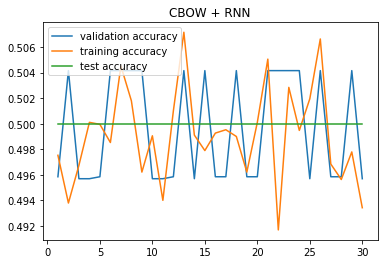

In [313]:
# Pretrained Emb + RNN (vocab is 474)

N_EPOCHS = 30
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
  start_time = time.time()

  train_loss, train_acc = train(train_dataloader)
  valid_loss, valid_acc = evaluate(valid_dataloader)
  test_loss, test_acc = evaluate(test_dataloader)

  end_time = time.time()

  valid_accuracies.append(valid_acc)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
    
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  # save the best model
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'tut2-model.pt')

  print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
  print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
  print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
  print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('CBOW + RNN')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")

Epoch: 01 | Time: 2m 30s
train_loss: 20.348, train_acc: 0.505
valid_loss: 20.106, valid_acc: 0.505
test loss: 20.306, test_acc: 0.500
Epoch: 02 | Time: 2m 28s
train_loss: 21.322, train_acc: 0.496
valid_loss: 24.639, valid_acc: 0.495
test loss: 24.398, test_acc: 0.500
Epoch: 03 | Time: 2m 29s
train_loss: 19.688, train_acc: 0.498
valid_loss: 14.616, valid_acc: 0.495
test loss: 14.473, test_acc: 0.500
Epoch: 04 | Time: 2m 27s
train_loss: 12.211, train_acc: 0.500
valid_loss: 5.989, valid_acc: 0.505
test loss: 6.049, test_acc: 0.500
Epoch: 05 | Time: 2m 28s
train_loss: 14.677, train_acc: 0.507
valid_loss: 7.200, valid_acc: 0.505
test loss: 7.272, test_acc: 0.500
Epoch: 06 | Time: 2m 28s
train_loss: 16.974, train_acc: 0.499
valid_loss: 21.230, valid_acc: 0.495
test loss: 21.022, test_acc: 0.500
Epoch: 07 | Time: 2m 28s
train_loss: 11.251, train_acc: 0.501
valid_loss: 22.404, valid_acc: 0.505
test loss: 22.627, test_acc: 0.500
Epoch: 08 | Time: 2m 28s
train_loss: 11.855, train_acc: 0.499
vali

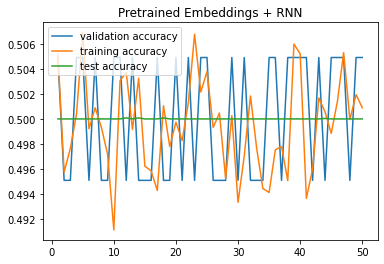

In [57]:
# Pretrained Emb + RNN (vocab is 474)

N_EPOCHS = 50
best_valid_loss = float('inf')

valid_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(N_EPOCHS):
  
  start_time = time.time()

  train_loss, train_acc = train(train_dataloader)
  valid_loss, valid_acc = evaluate(valid_dataloader)
  test_loss, test_acc = evaluate(test_dataloader)

  end_time = time.time()

  valid_accuracies.append(valid_acc)
  train_accuracies.append(train_acc)
  test_accuracies.append(test_acc)
    
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)

  # save the best model
  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), 'tut2-model.pt')

  print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
  print(f'train_loss: {train_loss:.3f}, train_acc: {train_acc:.3f}')
  print(f'valid_loss: {valid_loss:.3f}, valid_acc: {valid_acc:.3f}')
  print(f'test loss: {test_loss:.3f}, test_acc: {test_acc:.3f}')

plt.title('Pretrained Embeddings + RNN')
plt.plot(range(1, N_EPOCHS+1), valid_accuracies, label = 'validation accuracy')
plt.plot(range(1, N_EPOCHS+1), train_accuracies, label = 'training accuracy')
plt.plot(range(1, N_EPOCHS+1), test_accuracies, label = 'test accuracy')
plt.legend(loc="upper left")